<a href="https://colab.research.google.com/github/sai-darshan-k/Quantum-Computing/blob/main/2348548_Lab2_QC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Perform the operation X, Y, Z, H, S, T
2. Execute the operations on a state vector.
3. Draw a simple circuit for these operation.
4. Finally,  simulate the result of running this experiment  10000 times.
5. Proof that R is square root of NOT  operation. where R is a Hadamard operation, followed by the S operation, followed by another Hadamard operation.

In [ ]:
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, circuit_drawer
from numpy import sqrt
import numpy as np

### Defining Quantum Gates

In [ ]:

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1/sqrt(2), 1/sqrt(2)], [1/sqrt(2), -1/sqrt(2)]])
S = Operator([[1, 0], [0, 1j]])
T = Operator([[1, 0], [0, (1.0+1.0j)/sqrt(2)]])

v = Statevector([0,1])

In [ ]:
print("Initial State Vector |1>:")
print(v)

Initial State Vector |1>:
Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [ ]:
v = X @ v

print("\nState after applying X gate:")
print(v)


State after applying X gate:
Operator([[0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [ ]:
v = Y @ v

print("\nState after applying Y gate:")
print(v)


State after applying Y gate:
Operator([[0.+0.j, 0.+0.j],
          [0.+0.j, 0.+1.j]],
         input_dims=(2,), output_dims=(2,))


In [ ]:
v = Z @ v

print("\nState after applying Z gate:")
print(v)


State after applying Z gate:
Operator([[0.+0.j, 0.+0.j],
          [0.+0.j, 0.-1.j]],
         input_dims=(2,), output_dims=(2,))


In [ ]:
v = H @ v

print("\nState after applying H gate:")
print(v)


State after applying H gate:
Operator([[0.+0.j        , 0.-0.70710678j],
          [0.+0.j        , 0.+0.70710678j]],
         input_dims=(2,), output_dims=(2,))


In [ ]:
v = S @ v

print("\nState after applying S gate:")
print(v)


State after applying S gate:
Operator([[ 0.        +0.j        ,  0.        -0.70710678j],
          [ 0.        +0.j        , -0.70710678+0.j        ]],
         input_dims=(2,), output_dims=(2,))


In [ ]:
v = T @ v

print("\nState after applying T gate:")
print(v)


State after applying T gate:
Operator([[ 0. +0.j        ,  0. -0.70710678j],
          [ 0. +0.j        , -0.5-0.5j       ]],
         input_dims=(2,), output_dims=(2,))


## Drawing the Quantum Circuit

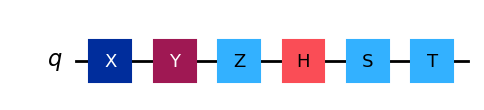

In [ ]:
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.y(0)
circuit.z(0)
circuit.h(0)
circuit.s(0)
circuit.t(0)

display(circuit.draw(output='mpl'))

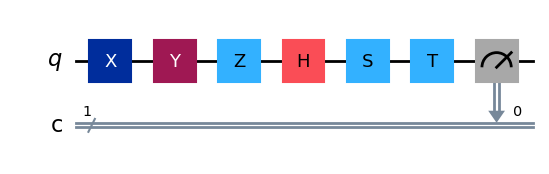

In [ ]:
#  quantum circuit with 1 qubit and 1 classical bit for measurement
qc = QuantumCircuit(1, 1)

# sequential X, Y, Z, H, S, and T gates
qc.x(0)
qc.y(0)
qc.z(0)
qc.h(0)
qc.s(0)
qc.t(0)

# qubit measurement
qc.measure(0, 0)

# drawing the circuit
circuit_drawer(qc, output='mpl')


### **Explanation of the Circuit**

1. **Initial State**: The qubit starts in the $ |0\rangle $ state
2. **X Gate**: The first gate applied is the **X gate**, which flips the state from $ |0\rangle $ to $ |1\rangle $
3. **Y Gate**: Next, the **Y gate** is applied. This introduces a phase of $ \pi/2 $ and flips the qubit’s state
4. **Z Gate**: The **Z gate** applies a phase shift of $ \pi $ to the $ |1\rangle $ state, leaving the probability of measurement unchanged but altering the relative phase
5. **H Gate**: The **Hadamard gate** creates a superposition state, meaning the qubit will have an equal probability of being measured as $ |0\rangle $ or $ |1\rangle $
6. **S Gate**: The **Phase (S) gate** introduces a phase shift of $ \pi/2 $ to the $ |1\rangle $ state
7. **T Gate**: The **T gate** introduces a finer phase shift of $ \pi/4 $ to the $ |1\rangle $ state
8. Once the circuit is created, it is executed on a quantum simulator to observe the outcomes. Each gate transforms the qubit state, and the final measurement gives a result based on the cumulative effect of all the gates

In [ ]:
ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
v.draw("text")

[0. -0.70710678j,0.5+0.5j       ]

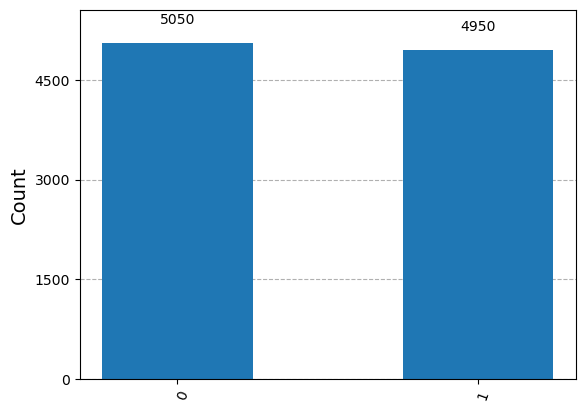

In [ ]:
stats = v.sample_counts(10000)
plot_histogram(stats)

In [ ]:
from IPython.display import display, Math
# display(Math('R^2'))

In [ ]:
# defining the operators
H = Operator([[1/sqrt(2), 1/sqrt(2)], [1/sqrt(2), -1/sqrt(2)]])  # Hadamard
S = Operator([[1, 0], [0, 1j]])  # S gate
X = Operator([[0, 1], [1, 0]])  # Pauli-X gate(NOT gate)

# R = H * S * H
R = H @ S @ H
display(Math(" R = H * S * H  \, matrix:"))
print(R)

<IPython.core.display.Math object>

Operator([[0.5+0.5j, 0.5-0.5j],
          [0.5-0.5j, 0.5+0.5j]],
         input_dims=(2,), output_dims=(2,))


In [ ]:
# calculating R-squared
R_squared = R @ R
display(Math("\nR^2 \,  matrix:"))
print(R_squared)

<IPython.core.display.Math object>

Operator([[0.-2.46519033e-32j, 1.+0.00000000e+00j],
          [1.+0.00000000e+00j, 0.+2.46519033e-32j]],
         input_dims=(2,), output_dims=(2,))


In [ ]:
# verifying R-squared is equal to the X (Pauli-X) gate
display(Math("\nPauli-X \, (NOT gate) \,matrix:"))
print(X)

<IPython.core.display.Math object>

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [ ]:
# comparing R-squared with the X gate
is_R_squared_equal_to_X = np.allclose(R_squared, X)
display(Math("\nIs \, R^2 \, equal \, to \, the \, Pauli-X \, gate \, (NOT gate)? \, -> \, "))
print(is_R_squared_equal_to_X)

<IPython.core.display.Math object>

True


In [ ]:
# verifying if R is unitary (R * R† = I)
R_dagger = np.conjugate(R).T  # R† (conjugate transpose of R)
identity_check = R @ R_dagger  # R * R†

display(Math("\nR * R^† :")) # Should be close to the identity matrix
print(identity_check)

<IPython.core.display.Math object>

Operator([[1.00000000e+00+0.j, 2.46519033e-32+0.j],
          [2.46519033e-32+0.j, 1.00000000e+00+0.j]],
         input_dims=(2,), output_dims=(2,))


In [ ]:
# verifying if  the result is close to the identity matrix
is_R_unitary = np.allclose(identity_check, np.eye(2))
display(Math("\nIs \, R \, unitary? \, -> \, "))
print(is_R_unitary)

<IPython.core.display.Math object>

True


In [ ]:
import numpy as np

# Define the Identity matrix and Pauli-X gate
I = np.array([[1, 0],
              [0, 1]])

X = np.array([[0, 1],
              [1, 0]])

# Define the projector |0><0| and |1><1|
proj_0 = np.array([[1, 0],
                   [0, 0]])

proj_1 = np.array([[0, 0],
                   [0, 1]])

# Calculate the controlled unitary operation C(x)
C_x = np.kron(proj_0, I) + np.kron(proj_1, X)

# Display the result
print("Controlled unitary operation C(x):")
print(C_x)


Controlled unitary operation C(x):
[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]


In [ ]:
import numpy as np

# Define basic matrices
I = np.array([[1, 0], [0, 1]])  # Identity matrix (2x2)

# SWAP derived from the definition of swapping the initial states and stuff
# |00> SWAP |00>
# |01> SWAP |10>
# |10> SWAP |01>
# |11> SWAP |11>

SWAP = np.array([[1, 0, 0, 0],
                 [0, 0, 1, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1]])  # SWAP gate (acts on 2 qubits)

# Projectors for the control qubit
proj_0 = np.array([[1, 0], [0, 0]])  # |0><0| projector
proj_1 = np.array([[0, 0], [0, 1]])  # |1><1| projector

# Construct the CSWAP operation
# When control qubit is |0>, we apply Identity to the two target qubits
control_0 = np.kron(proj_0, np.kron(I, I))  # |0><0| ⊗ I ⊗ I

# When control qubit is |1>, we apply the SWAP gate to the two target qubits
control_1 = np.kron(proj_1, SWAP)  # |1><1| ⊗ SWAP

# Combine the two cases to form the full CSWAP gate
CSWAP = control_0 + control_1

# Display the CSWAP matrix
print("CSWAP Matrix:")
print(CSWAP)

CSWAP Matrix:
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]]


In [ ]:
kron1 = np.kron(I,I)


print("\n\n")

print(kron1)

print("\n")

print(proj_0)

print("\n")

control = np.kron(proj_0,kron1)
print(control)




[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


[[1 0]
 [0 0]]


[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
